<h1>Contents</h1>

I. Dataset Preparation  
1. Import Library 
2. Function 

II. Data Exploration  
1. Application Train
2. Bureau 
3. Bureau Balance 
4. Credit Card Balance
5. POS CASH Balance  
6. Previous Application
7. Installation Payments

III. Preprocessing  
1. Handling Outliers
2. Handling Missing Values 
3. Handling Categorical Features 
4. Feature Engineering

IV. Building Model  
1. Create Validation Sets  
2. Standard Scaling
3. Hyperpareter tunning
4. Fit the Model 
5. Predict

# I. Dataset Preparation

## 1. Import library

In [6]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import LabelEncoder
from plotly.offline import init_notebook_mode
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

init_notebook_mode(connected=True)

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

In [7]:
files = {
    "application_train": r"dseb63_application_train.csv",
    "application_test": r"dseb63_application_test.csv",
    "bureau": r"dseb63_bureau.csv",
    "bureau_balance": r"dseb63_bureau_balance.csv",
    "previous_application": r"dseb63_previous_application.csv",
    "POS_CASH_balance": r"dseb63_POS_CASH_balance.csv",
    "installments_payments": r"dseb63_installments_payments.csv",
    "credit_card_balance": r"dseb63_credit_card_balance.csv"
}

# Load all files into a dictionary
data = {}
for key, file in files.items():
    data[key] = pd.read_csv(file)
    print(f"{key} shape: {data[key].shape}")

application_train shape: (246009, 123)
application_test shape: (61502, 122)
bureau shape: (1465325, 17)
bureau_balance shape: (27299925, 3)
previous_application shape: (1413701, 37)
POS_CASH_balance shape: (8543375, 8)
installments_payments shape: (7744758, 8)
credit_card_balance shape: (3227965, 23)


In [8]:
data['application_train'].drop(columns = 'Unnamed: 0', inplace = True)
data['application_test'].drop(columns = 'Unnamed: 0', inplace = True)

## 2. Function

In [10]:
# Function to print unique data types
def print_dtypes(df, dataset_name):
    print(f"\nUnique data types in {dataset_name}:")
    print(df.dtypes.value_counts())

# Function to check for missing values
def check_missing_values(df, dataset_name):
    missing_values = df.isnull().sum()
    missing_columns = missing_values[missing_values > 0].sort_values(ascending=False)  # Only show columns with missing values
    if not missing_columns.empty:
        print(f"\nMissing values in {dataset_name}:\n{missing_columns}")
    else:
        print(f"\nNo missing values in {dataset_name}.")

# Function to check the percentage of missing values
def check_missing_percentage(df):
    missing_percentage = 100 * df.isnull().sum() / len(df)
    missing_columns = missing_percentage[missing_percentage > 0].sort_values(ascending=False) 
    return missing_columns

# Function to handle missing values
def handle_missing_values(df):
    # Drop columns with more than 80% missing values
    threshold = 0.8
    cols_to_drop = df.columns[df.isnull().mean() > threshold]
    df.drop(columns=cols_to_drop, inplace=True)
    print(f"Dropped columns with more than {threshold*100}% missing values: {list(cols_to_drop)}")
    return df

# Function to encode categorical columns and print shapes
def encode_categorical_features(df):
    le = LabelEncoder()
    
    education_mapping = {
        'Lower secondary': 0, 
        'Secondary / secondary special': 1, 
        'Incomplete higher': 2, 
        'Higher education': 3, 
        'Academic degree': 4
    }
  
    weekday_mapping = {
        'MONDAY': 0, 
        'TUESDAY': 0, 
        'WEDNESDAY': 0, 
        'THURSDAY': 0, 
        'FRIDAY': 0, 
        'SATURDAY': 1, 
        'SUNDAY': 1
    }

    if 'NAME_EDUCATION_TYPE' in df.columns:
        df['NAME_EDUCATION_TYPE'] = df['NAME_EDUCATION_TYPE'].map(education_mapping)
    if 'WEEKDAY_APPR_PROCESS_START' in df.columns:
        df['WEEKDAY_APPR_PROCESS_START'] = df['WEEKDAY_APPR_PROCESS_START'].map(weekday_mapping)
    
    categorical_columns = df.select_dtypes(include=['object']).columns
    columns_to_encode = [col for col in categorical_columns 
                         if col not in ['NAME_EDUCATION_TYPE', 'WEEKDAY_APPR_PROCESS_START']]
    for col in columns_to_encode:
        ##Apply label encoding for col with only 2 unique value
        if df[col].nunique() == 2:
            df[col] = le.fit_transform(df[col])
        else:
        ##Apply One-Hot Enconding for multi-category columns
            df = pd.get_dummies(df, columns=[col], drop_first = True)
            
        
    return df

# Function to handle missing values
def impute_cols_with_nas(df):
    # Impute missing values for numerical columns with the median
    num_cols = df.select_dtypes(include=['float64', 'int64']).columns
    for col in num_cols:
        df[col].fillna(df[col].median(), inplace=True)
        
    # Impute missing values for categorical columns with the mode
    cat_cols = df.select_dtypes(include=['object']).columns
    for col in cat_cols:
        df[col].fillna(df[col].mode()[0], inplace=True)

# <a id="III">III. Preprocessing </a>

## <a id="1.">1. Handling Outlier</a>

### <a id="1.1.">1.1. Invalid data</a>

Invalid data refers to information that does not conform to the expected format or valid range

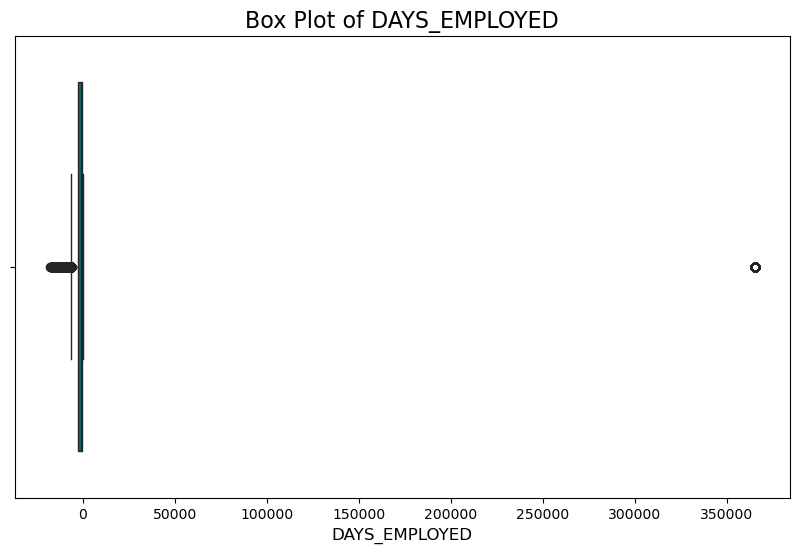

In [15]:
df = data['application_train']

# Plotting the box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['DAYS_EMPLOYED'], color='teal')
plt.title('Box Plot of DAYS_EMPLOYED', fontsize=16)
plt.xlabel('DAYS_EMPLOYED', fontsize=12)
plt.show()

In [16]:
data['application_train']['DAYS_EMPLOYED'].replace(365243, np.nan, inplace= True)
data['application_test']['DAYS_EMPLOYED'].replace(365243, np.nan, inplace= True)

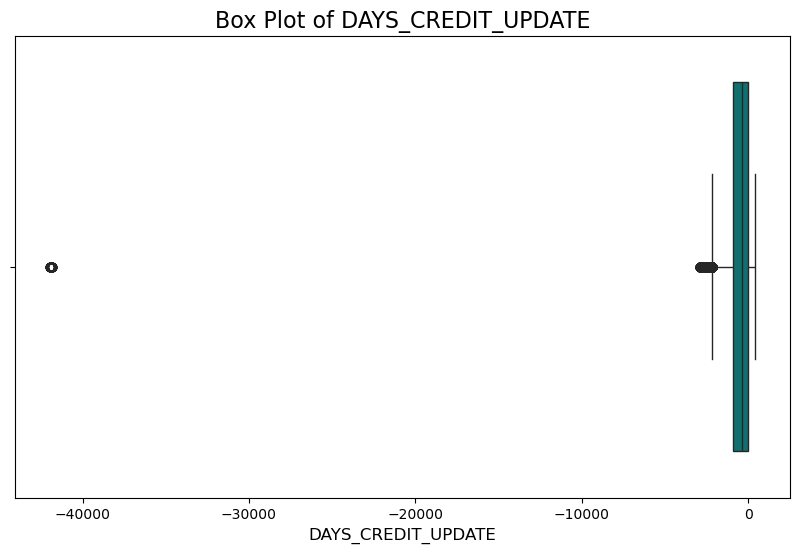

In [17]:
df = data['bureau']

# Plotting the box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['DAYS_CREDIT_UPDATE'], color='teal')
plt.title('Box Plot of DAYS_CREDIT_UPDATE', fontsize=16)
plt.xlabel('DAYS_CREDIT_UPDATE', fontsize=12)
plt.show()

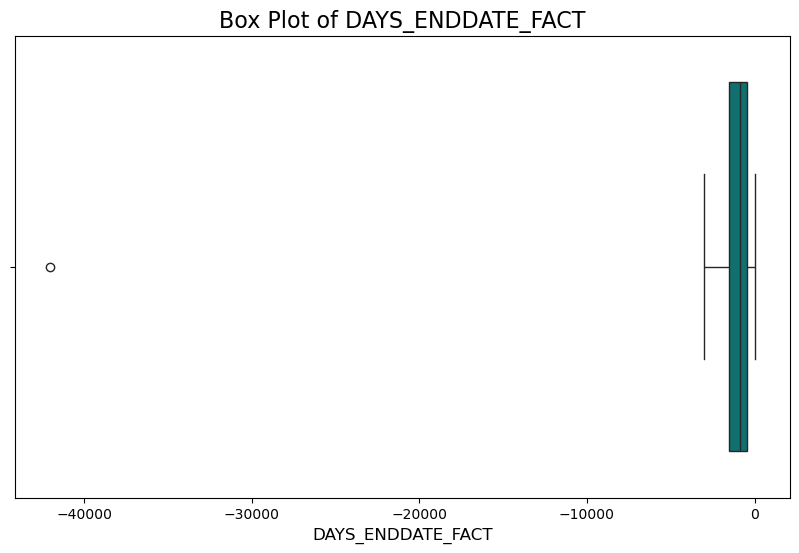

In [18]:
df = data['bureau']

# Plotting the box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['DAYS_ENDDATE_FACT'], color='teal')
plt.title('Box Plot of DAYS_ENDDATE_FACT', fontsize=16)
plt.xlabel('DAYS_ENDDATE_FACT', fontsize=12)
plt.show()

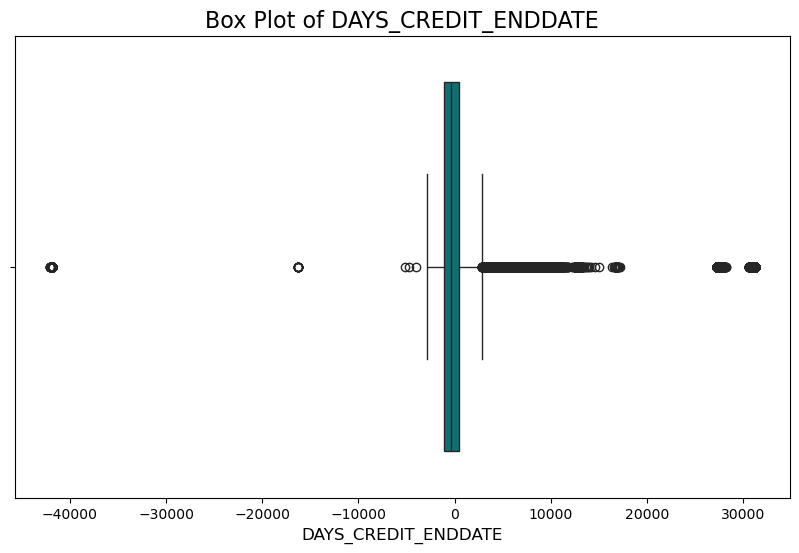

In [19]:
df = data['bureau']

# Plotting the box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['DAYS_CREDIT_ENDDATE'], color='teal')
plt.title('Box Plot of DAYS_CREDIT_ENDDATE', fontsize=16)
plt.xlabel('DAYS_CREDIT_ENDDATE', fontsize=12)
plt.show()

In [20]:
data['bureau']['DAYS_CREDIT_UPDATE'].replace(-41947, np.nan, inplace= True)
data['bureau']['DAYS_ENDDATE_FACT'].replace(-42023.0, np.nan, inplace= True)
data['bureau']['DAYS_CREDIT_ENDDATE'].replace(-42060.0, np.nan, inplace= True)
data['bureau']['DAYS_CREDIT_ENDDATE'].loc[data['bureau']['DAYS_CREDIT_ENDDATE'] > 25000] = np.nan

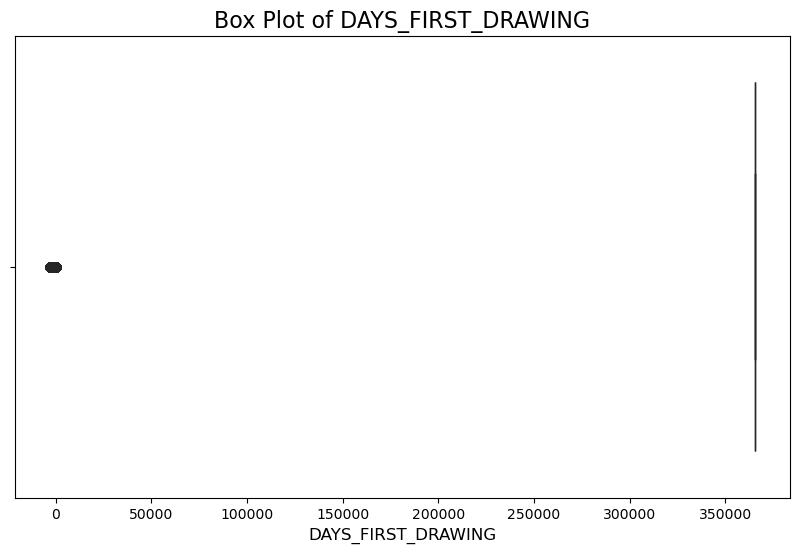

In [21]:
df = data['previous_application']

# Plotting the box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['DAYS_FIRST_DRAWING'], color='teal')
plt.title('Box Plot of DAYS_FIRST_DRAWING', fontsize=16)
plt.xlabel('DAYS_FIRST_DRAWING', fontsize=12)
plt.show()

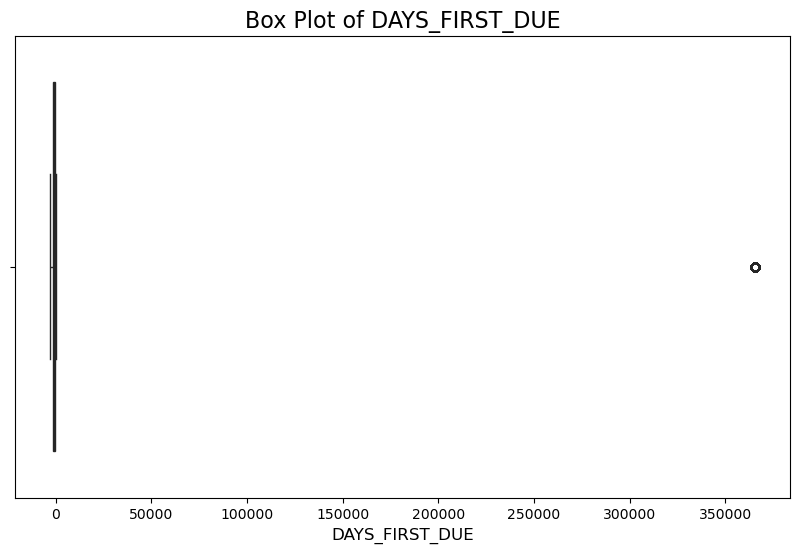

In [22]:
df = data['previous_application']

# Plotting the box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['DAYS_FIRST_DUE'], color='teal')
plt.title('Box Plot of DAYS_FIRST_DUE', fontsize=16)
plt.xlabel('DAYS_FIRST_DUE', fontsize=12)
plt.show()

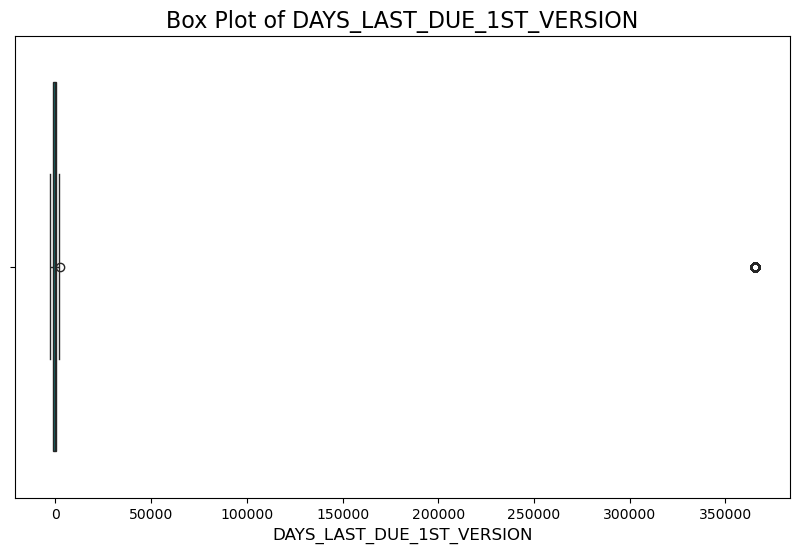

In [23]:
df = data['previous_application']

# Plotting the box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['DAYS_LAST_DUE_1ST_VERSION'], color='teal')
plt.title('Box Plot of DAYS_LAST_DUE_1ST_VERSION', fontsize=16)
plt.xlabel('DAYS_LAST_DUE_1ST_VERSION', fontsize=12)
plt.show()

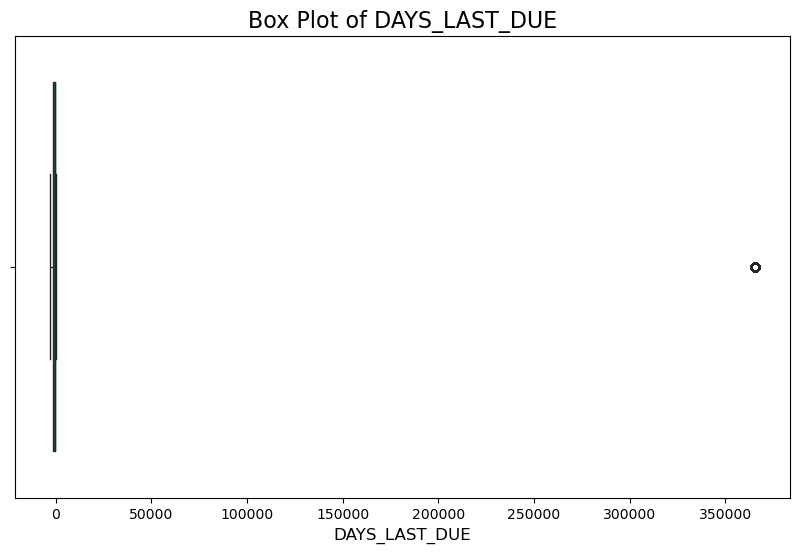

In [24]:
df = data['previous_application']

# Plotting the box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['DAYS_LAST_DUE'], color='teal')
plt.title('Box Plot of DAYS_LAST_DUE', fontsize=16)
plt.xlabel('DAYS_LAST_DUE', fontsize=12)
plt.show()

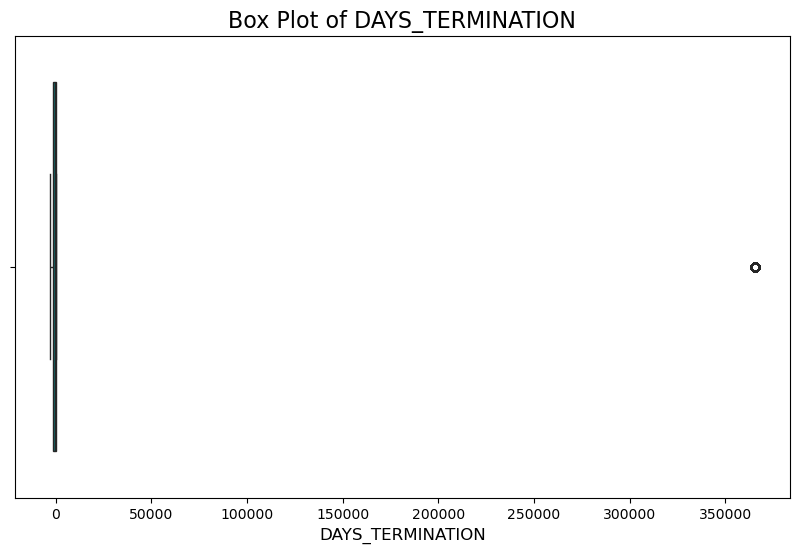

In [25]:
df = data['previous_application']

# Plotting the box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['DAYS_TERMINATION'], color='teal')
plt.title('Box Plot of DAYS_TERMINATION', fontsize=16)
plt.xlabel('DAYS_TERMINATION', fontsize=12)
plt.show()

In [26]:
data['previous_application']['DAYS_FIRST_DRAWING'].replace(365243, np.nan, inplace= True)
data['previous_application']['DAYS_FIRST_DUE'].replace(365243, np.nan, inplace= True)
data['previous_application']['DAYS_LAST_DUE_1ST_VERSION'].replace(365243, np.nan, inplace= True)
data['previous_application']['DAYS_LAST_DUE'].replace(365243, np.nan, inplace= True)
data['previous_application']['DAYS_TERMINATION'].replace(365243, np.nan, inplace= True)

## <a id="2.">2. Handling missing value</a>

### <a id="2.1.">2.1. Missing value in other form</a>

In [29]:
for key in data.keys():
    data[key].replace(['XNA', 'Unknown', 'Unknown type of loan'], np.nan, inplace= True)

### <a id="2.2.">2.2. Checking missing value percentage</a>

We found that there are a lot of missing values in the datasets. Lets check percentages

In [32]:
# Check missing percentage for each dataset
for key in data.keys():
    print(f"\nMissing value percentages in {key}:")
    missing_percentage = check_missing_percentage(data[key])
    print(missing_percentage)


Missing value percentages in application_train:
COMMONAREA_MEDI                 69.887687
COMMONAREA_AVG                  69.887687
COMMONAREA_MODE                 69.887687
NONLIVINGAPARTMENTS_MODE        69.456402
NONLIVINGAPARTMENTS_MEDI        69.456402
NONLIVINGAPARTMENTS_AVG         69.456402
FONDKAPREMONT_MODE              68.406847
LIVINGAPARTMENTS_MODE           68.370263
LIVINGAPARTMENTS_MEDI           68.370263
LIVINGAPARTMENTS_AVG            68.370263
FLOORSMIN_AVG                   67.865403
FLOORSMIN_MODE                  67.865403
FLOORSMIN_MEDI                  67.865403
YEARS_BUILD_MEDI                66.535777
YEARS_BUILD_AVG                 66.535777
YEARS_BUILD_MODE                66.535777
OWN_CAR_AGE                     65.927669
LANDAREA_AVG                    59.400266
LANDAREA_MODE                   59.400266
LANDAREA_MEDI                   59.400266
BASEMENTAREA_MEDI               58.540948
BASEMENTAREA_MODE               58.540948
BASEMENTAREA_AVG           

### <a id="2.3.">2.3. Drop missing value</a>

Removing the columns having more than 80% of missing values. Possible that we lose some info, but it does not make sense to keep them either.

In [35]:
# Apply missing value handling to all datasets
for key in data.keys():
    data[key] = handle_missing_values(data[key])

Dropped columns with more than 80.0% missing values: []
Dropped columns with more than 80.0% missing values: []
Dropped columns with more than 80.0% missing values: []
Dropped columns with more than 80.0% missing values: []
Dropped columns with more than 80.0% missing values: ['RATE_INTEREST_PRIMARY', 'RATE_INTEREST_PRIVILEGED', 'DAYS_FIRST_DRAWING']
Dropped columns with more than 80.0% missing values: []
Dropped columns with more than 80.0% missing values: []
Dropped columns with more than 80.0% missing values: []


### <a id="2.4.">2.4. Imputing missing value</a>


In [37]:
for key in data.keys():
    impute_cols_with_nas(data[key])

## <a id="2.">2. Handling Categorical Features</a>

In [39]:
for key in data.keys():
    print(f"\nProcessing {key} dataset...")
    data[key] = encode_categorical_features(data[key])
    print(f"Processed {key} dataset. Final shape: {data[key].shape}")


Processing application_train dataset...
Processed application_train dataset. Final shape: (246009, 219)

Processing application_test dataset...
Processed application_test dataset. Final shape: (61502, 218)

Processing bureau dataset...
Processed bureau dataset. Final shape: (1465325, 33)

Processing bureau_balance dataset...
Processed bureau_balance dataset. Final shape: (27299925, 9)

Processing previous_application dataset...
Processed previous_application dataset. Final shape: (1413701, 129)

Processing POS_CASH_balance dataset...
Processed POS_CASH_balance dataset. Final shape: (8543375, 14)

Processing installments_payments dataset...
Processed installments_payments dataset. Final shape: (7744758, 8)

Processing credit_card_balance dataset...
Processed credit_card_balance dataset. Final shape: (3227965, 28)


Categorical encoding can chage the number of features in train and test so align them so that they won't cause while model building

In [41]:
train_labels = data['application_train']['TARGET']

data['application_train'], data['application_test'] = data['application_train'].align(data['application_test'], join = 'inner', axis = 1)

data['application_train']['TARGET'] = train_labels

print('Training Features shape: ', data['application_train'].shape)
print('Testing Features shape: ', data['application_test'].shape)

Training Features shape:  (246009, 219)
Testing Features shape:  (61502, 218)


## <a id="3.">3. Feature Engineering</a>

### <a id="3.1">3.1 Feature Engineering - Previous Applications</a>


In [44]:
data['previous_application']['credit_goods_diff'] = data['previous_application']['AMT_CREDIT'] - data['previous_application']['AMT_GOODS_PRICE']
data['previous_application']['credit_goods_ratio'] = data['previous_application']['AMT_CREDIT'] / data['previous_application']['AMT_GOODS_PRICE']
data['previous_application']['application_credit_diff'] = data['previous_application']['AMT_APPLICATION'] - data['previous_application']['AMT_CREDIT']
data['previous_application']['application_credit_ratio'] = data['previous_application']['AMT_APPLICATION'] / data['previous_application']['AMT_CREDIT']
data['previous_application']['CREDIT_ANNUITY_diff'] = data['previous_application']['AMT_ANNUITY'] - data['previous_application']['AMT_CREDIT']
data['previous_application']['CREDIT_ANNUITY_ratio'] = data['previous_application']['AMT_ANNUITY'] / data['previous_application']['AMT_CREDIT']

In [45]:
data['previous_application']['credit_goods_ratio'].replace([np.inf, -np.inf], data['previous_application']['credit_goods_ratio'].median(), inplace = True)
data['previous_application']['application_credit_ratio'].replace([np.inf, -np.inf], data['previous_application']['application_credit_ratio'].median(), inplace = True)
data['previous_application']['CREDIT_ANNUITY_ratio'].replace([np.inf, -np.inf], data['previous_application']['CREDIT_ANNUITY_ratio'].median(), inplace = True)
data['previous_application']['application_credit_diff'].replace([np.inf, -np.inf], data['previous_application']['application_credit_diff'].median(), inplace = True)

### <a id="3.2">3.2 Feature Engineering - Bureau Data</a>

In [47]:
data['bureau']['LOAN_RATE'] = data['bureau']['AMT_ANNUITY'] / data['bureau']['AMT_CREDIT_SUM']

In [48]:
data['bureau']['LOAN_RATE'].replace([np.inf, -np.inf], data['bureau']['LOAN_RATE'].median(), inplace = True)

### <a id="3.3">3.3 Feature Engineering - Previous Installments</a>

In [50]:
data['POS_CASH_balance']['CNT_installment_diff'] = data['POS_CASH_balance']['CNT_INSTALMENT'] - data['POS_CASH_balance']['CNT_INSTALMENT_FUTURE']
data['POS_CASH_balance']['LATE_PAYMENT'] = data['POS_CASH_balance']['SK_DPD'] > 0.0

In [51]:
data['POS_CASH_balance']['CNT_installment_diff'].replace([np.inf, -np.inf], data['POS_CASH_balance']['CNT_installment_diff'].median(), inplace = True)

### <a id="3.4">3.4 Feature Engineering - Pos Cash Balance</a>

In [53]:
data['credit_card_balance']['OVER_LIMIT'] = data['credit_card_balance']['AMT_BALANCE'] > data['credit_card_balance']['AMT_CREDIT_LIMIT_ACTUAL']
data['credit_card_balance']['BALANCE_CLEARED'] = data['credit_card_balance']['AMT_BALANCE'] == 0.0
data['credit_card_balance']['LOW_PAYMENT'] = data['credit_card_balance']['AMT_PAYMENT_CURRENT'] < data['credit_card_balance']['AMT_INST_MIN_REGULARITY']
data['credit_card_balance']['LATE'] = data['credit_card_balance']['SK_DPD'] > 0.0

### <a id="3.5">3.5 Feature Engineering - Credit Card Balance </a>

In [55]:
data['credit_card_balance']['OVER_LIMIT'] = data['credit_card_balance']['AMT_BALANCE'] > data['credit_card_balance']['AMT_CREDIT_LIMIT_ACTUAL']
data['credit_card_balance']['BALANCE_CLEARED'] = data['credit_card_balance']['AMT_BALANCE'] == 0.0
data['credit_card_balance']['LOW_PAYMENT'] = data['credit_card_balance']['AMT_PAYMENT_CURRENT'] < data['credit_card_balance']['AMT_INST_MIN_REGULARITY']
data['credit_card_balance']['LATE'] = data['credit_card_balance']['SK_DPD'] > 0.0

### <a id="3.6">3.6. Feature Engineering - Installments_payments</a>

In [57]:
data['installments_payments']['installment_paid_late_in_days'] = data['installments_payments']['DAYS_ENTRY_PAYMENT'] - data['installments_payments']['DAYS_INSTALMENT']
data['installments_payments']['instalment_paid_over_amount'] = data['installments_payments']['AMT_PAYMENT'] - data['installments_payments']['AMT_INSTALMENT']
data['installments_payments']['LATE'] = data['installments_payments']['DAYS_ENTRY_PAYMENT'] > data['installments_payments']['DAYS_INSTALMENT']
data['installments_payments']['LOW_PAYMENT'] = data['installments_payments']['AMT_PAYMENT'] < data['installments_payments']['AMT_INSTALMENT']

In [58]:
data['installments_payments']['installment_paid_late_in_days'].replace([np.inf, -np.inf], data['installments_payments']['installment_paid_late_in_days'].median(), inplace = True)
data['installments_payments']['instalment_paid_over_amount'].replace([np.inf, -np.inf], data['installments_payments']['instalment_paid_over_amount'].median(), inplace = True)

### <a id="3.7">3.7. Feature Engineering - Application train & test</a>

In [60]:
poly_features = data['application_train'][['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH', 'TARGET']]
poly_features_test = data['application_test'][['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]

poly_target = poly_features['TARGET']
poly_features = poly_features.drop(columns = ['TARGET'])

                                  
poly_transformer = PolynomialFeatures(degree = 3)
poly_transformer.fit(poly_features)

poly_features = poly_transformer.transform(poly_features)
poly_features_test = poly_transformer.transform(poly_features_test)
poly_transformer.get_feature_names_out(input_features = ['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH'])[:15]

poly_features = pd.DataFrame(poly_features,columns = poly_transformer.get_feature_names_out(['EXT_SOURCE_1', 'EXT_SOURCE_2','EXT_SOURCE_3', 'DAYS_BIRTH']))

poly_features_test = pd.DataFrame(poly_features_test, columns = poly_transformer.get_feature_names_out(['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']))


In [61]:
data['application_train'] = pd.concat([data['application_train'], poly_features], axis=1)
data['application_train'] = data['application_train'].loc[:,~data['application_train'].columns.duplicated()].copy()
data['application_test'] = pd.concat([data['application_test'], poly_features_test], axis=1)
data['application_test'] = data['application_test'].loc[:,~data['application_test'].columns.duplicated()].copy()

data['application_train']['CREDIT_INCOME_PERCENT'] = data['application_train']['AMT_CREDIT'] / data['application_train']['AMT_INCOME_TOTAL']
data['application_train']['ANNUITY_INCOME_PERCENT'] = data['application_train']['AMT_ANNUITY'] / data['application_train']['AMT_INCOME_TOTAL']
data['application_train']['CREDIT_TERM'] = data['application_train']['AMT_ANNUITY'] / data['application_train']['AMT_CREDIT']
data['application_train']['DAYS_EMPLOYED_PERCENT'] = data['application_train']['DAYS_EMPLOYED'] / data['application_train']['DAYS_BIRTH']

data['application_test']['CREDIT_INCOME_PERCENT'] = data['application_test']['AMT_CREDIT'] / data['application_test']['AMT_INCOME_TOTAL']
data['application_test']['ANNUITY_INCOME_PERCENT'] = data['application_test']['AMT_ANNUITY'] / data['application_test']['AMT_INCOME_TOTAL']
data['application_test']['CREDIT_TERM'] = data['application_test']['AMT_ANNUITY'] / data['application_test']['AMT_CREDIT']
data['application_test']['DAYS_EMPLOYED_PERCENT'] = data['application_test']['DAYS_EMPLOYED'] / data['application_test']['DAYS_BIRTH']

In [62]:
for key in data.keys():
    print(f"\nMissing value percentages in {key}:")
    missing_percentage = check_missing_percentage(data[key])
    print(missing_percentage)


Missing value percentages in application_train:
Series([], dtype: float64)

Missing value percentages in application_test:
Series([], dtype: float64)

Missing value percentages in bureau:
LOAN_RATE    0.398683
dtype: float64

Missing value percentages in bureau_balance:
Series([], dtype: float64)

Missing value percentages in previous_application:
application_credit_ratio    19.563967
credit_goods_ratio           0.154771
CREDIT_ANNUITY_ratio         0.086793
dtype: float64

Missing value percentages in POS_CASH_balance:
Series([], dtype: float64)

Missing value percentages in installments_payments:
Series([], dtype: float64)

Missing value percentages in credit_card_balance:
Series([], dtype: float64)


## <a id="4.">4. Dataset Merging</a>

Before merging, aggregate all of them and calculate mean, sum, max and min values.

In [65]:
y_train = data['application_train']['TARGET']
X_train = data['application_train'].drop(columns=['TARGET']) 
X_test = data['application_test']  

In [66]:
bureau_balance_agg = data['bureau_balance'].groupby('SK_ID_BUREAU').agg(['mean', 'sum', 'max', 'min', 'count'])
bureau_balance_agg.columns = ['bureau_balance_' + '_'.join(col).strip() for col in bureau_balance_agg.columns.values]

data['bureau'] = data['bureau'].merge(bureau_balance_agg, on='SK_ID_BUREAU', how='left')

In [67]:
data['bureau'].drop(columns = 'SK_ID_BUREAU', inplace = True)
data['previous_application'].drop(columns = 'SK_ID_PREV', inplace = True)
data['POS_CASH_balance'].drop(columns = 'SK_ID_PREV', inplace = True)
data['installments_payments'].drop(columns = 'SK_ID_PREV', inplace = True)
data['credit_card_balance'].drop(columns = 'SK_ID_PREV', inplace = True)

In [68]:
bureau_agg = data['bureau'].groupby('SK_ID_CURR').agg(['mean', 'sum', 'max', 'min','count'])
bureau_agg.columns = ['_'.join(col).strip() for col in bureau_agg.columns.values]

previous_app_agg = data['previous_application'].groupby('SK_ID_CURR').agg(['mean', 'sum', 'max', 'min','count'])
previous_app_agg.columns = ['_'.join(col).strip() for col in previous_app_agg.columns.values]

credit_card_agg = data['credit_card_balance'].groupby('SK_ID_CURR').agg(['mean', 'sum', 'max', 'min','count'])
credit_card_agg.columns = ['_'.join(col).strip() for col in credit_card_agg.columns.values]

pos_cash_agg = data['POS_CASH_balance'].groupby('SK_ID_CURR').agg(['mean', 'sum', 'max', 'min', 'count'])
pos_cash_agg.columns = ['_'.join(col).strip() for col in pos_cash_agg.columns.values]

installments_agg = data['installments_payments'].groupby('SK_ID_CURR').agg(['mean', 'sum', 'max', 'min', 'count'])
installments_agg.columns = ['installments_' + '_'.join(col).strip() for col in installments_agg.columns.values]

In [69]:
application_train = X_train.merge(bureau_agg, on='SK_ID_CURR', how='left')
application_train = application_train.merge(previous_app_agg, on='SK_ID_CURR', how='left')
application_train = application_train.merge(credit_card_agg, on='SK_ID_CURR', how='left')
application_train = application_train.merge(pos_cash_agg, on='SK_ID_CURR', how='left')
application_train = application_train.merge(installments_agg, on='SK_ID_CURR', how='left')

application_test = X_test.merge(bureau_agg, on='SK_ID_CURR', how='left')
application_test = application_test.merge(previous_app_agg, on='SK_ID_CURR', how='left')
application_test = application_test.merge(credit_card_agg, on='SK_ID_CURR', how='left')
application_test = application_test.merge(pos_cash_agg, on='SK_ID_CURR', how='left')
application_test = application_test.merge(installments_agg, on='SK_ID_CURR', how='left')

In [70]:
## Fill missing value after merging
impute_cols_with_nas(application_train)
impute_cols_with_nas(application_test)

In [71]:
print(application_train.shape)
print(application_test.shape)

(246009, 1548)
(61502, 1548)


In [117]:
application_train['TARGET'] = y_train

In [119]:
## Save the processed data
application_train.to_csv("application_train_data.csv", index = False)
application_test.to_csv("application_test_data.csv", index = False)